<a href="https://colab.research.google.com/github/MatthewK84/Python-Code/blob/main/Spectrogram_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

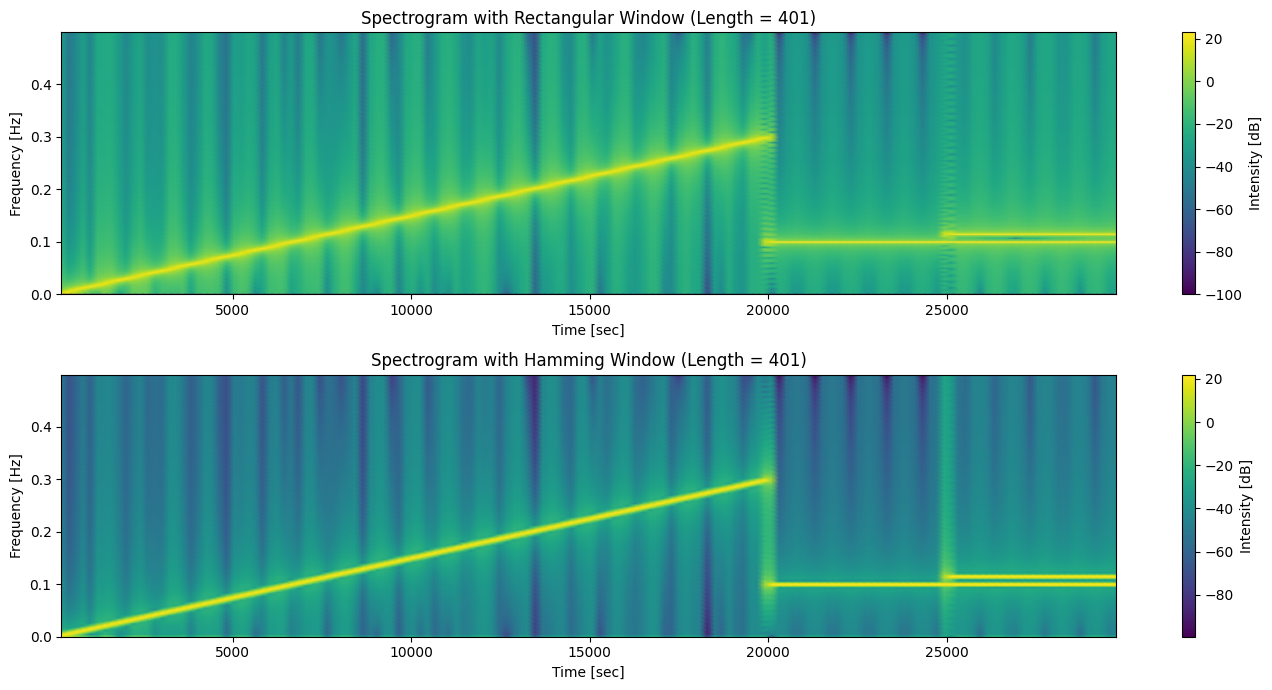

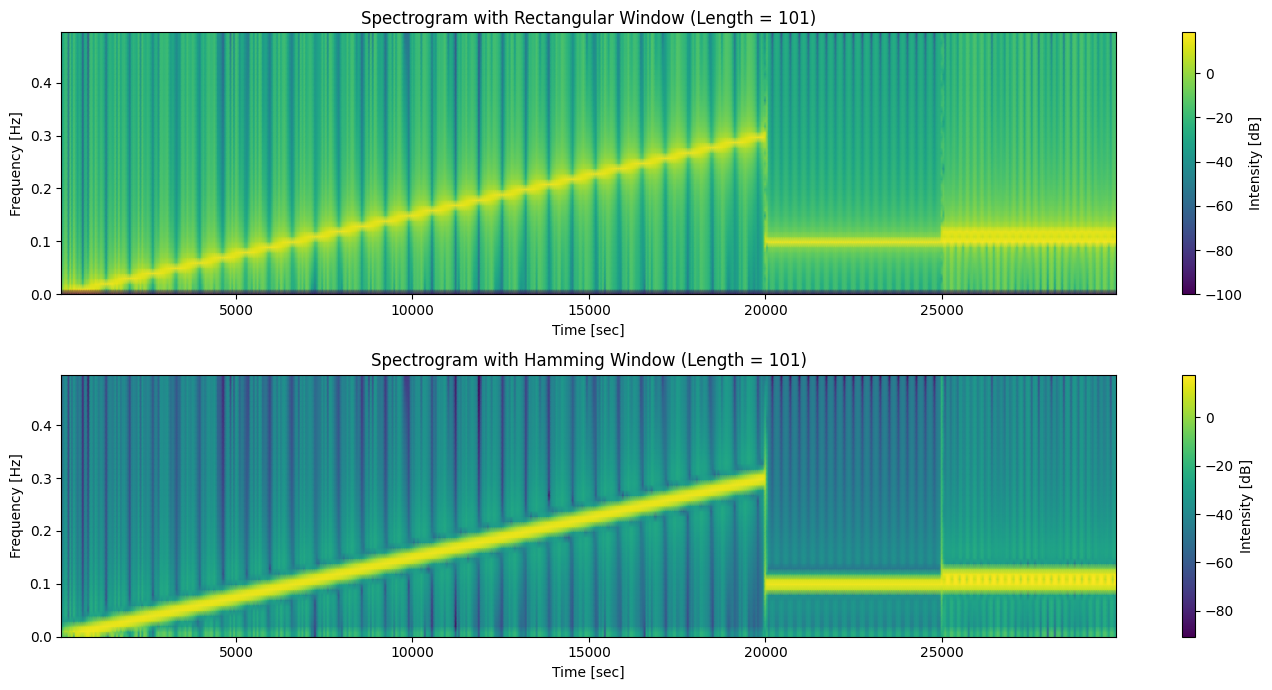

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from scipy.signal.windows import hamming

# Define Signal Parameters
n1 = np.arange(0, 20001)
n2 = np.arange(20001, 25001)
n3 = np.arange(25001, 30001)

# Create Signal
x1 = np.cos((15 * np.pi * 10**-6) * n1**2)
x2 = np.cos(0.2 * np.pi * n2)
x3 = np.cos(0.2 * np.pi * n3) + np.cos(0.23 * np.pi * n3)
x = np.concatenate([x1, x2, x3])

# Define Window Lengths
window_lengths = [401, 101]

# Create and Plot Spectrograms
for L in window_lengths:
    plt.figure(figsize=(14, 7))

    # Rectangular Window
    f, t, Sxx = spectrogram(x, window='boxcar', nperseg=L, noverlap=L//2)
    plt.subplot(2, 1, 1)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud')  # Add small constant to avoid log(0)
    plt.title(f'Spectrogram with Rectangular Window (Length = {L})')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Intensity [dB]')

    # Hamming Window
    f, t, Sxx = spectrogram(x, window=hamming(L), nperseg=L, noverlap=L//2)
    plt.subplot(2, 1, 2)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud')  # Small Constant to Avoid log(0)
    plt.title(f'Spectrogram with Hamming Window (Length = {L})')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Intensity [dB]')

    plt.tight_layout()
    plt.show()